In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_theme()
sns.set(rc={"figure.dpi":300})
import warnings
warnings.filterwarnings("ignore")


In [18]:
df=pd.read_csv("forbes_billionaires_2022.csv")


In [19]:
df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'category', 'source',
       'country', 'state', 'city', 'organization', 'selfMade', 'gender',
       'birthDate', 'title', 'philanthropyScore', 'bio', 'about'],
      dtype='object')

In [20]:
df=df.loc[:,["rank","personName","age","finalWorth","category","source","country","organization","selfMade","gender","title"]]

In [47]:
df.head()

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,gender,title
0,1,Elon Musk,50.0,219000,Automotive,"Tesla, SpaceX",United States,Tesla,True,M,CEO
1,2,Jeff Bezos,58.0,171000,Technology,Amazon,United States,Amazon,True,M,Entrepreneur
2,3,Bernard Arnault & family,73.0,158000,Fashion & Retail,LVMH,France,LVMH Moët Hennessy Louis Vuitton,False,M,Chairman and CEO
3,4,Bill Gates,66.0,129000,Technology,Microsoft,United States,Bill & Melinda Gates Foundation,True,M,Cofounder
4,5,Warren Buffett,91.0,118000,Finance & Investments,Berkshire Hathaway,United States,Berkshire Hathaway,True,M,CEO


In [21]:
df["gender"].value_counts()

M    2341
F     311
Name: gender, dtype: int64

In [25]:
df[df["country"]=="Turkey"].gender.value_counts()

M    19
F     4
Name: gender, dtype: int64

In [23]:
df.selfMade.value_counts()

True     1891
False     777
Name: selfMade, dtype: int64

In [27]:
df_gender=df.groupby(["gender"])

In [76]:
df_gender["age"].mean()

gender
F    62.798611
M    64.392045
Name: age, dtype: float64

Text(0.5, 0, 'Cinsiyet')

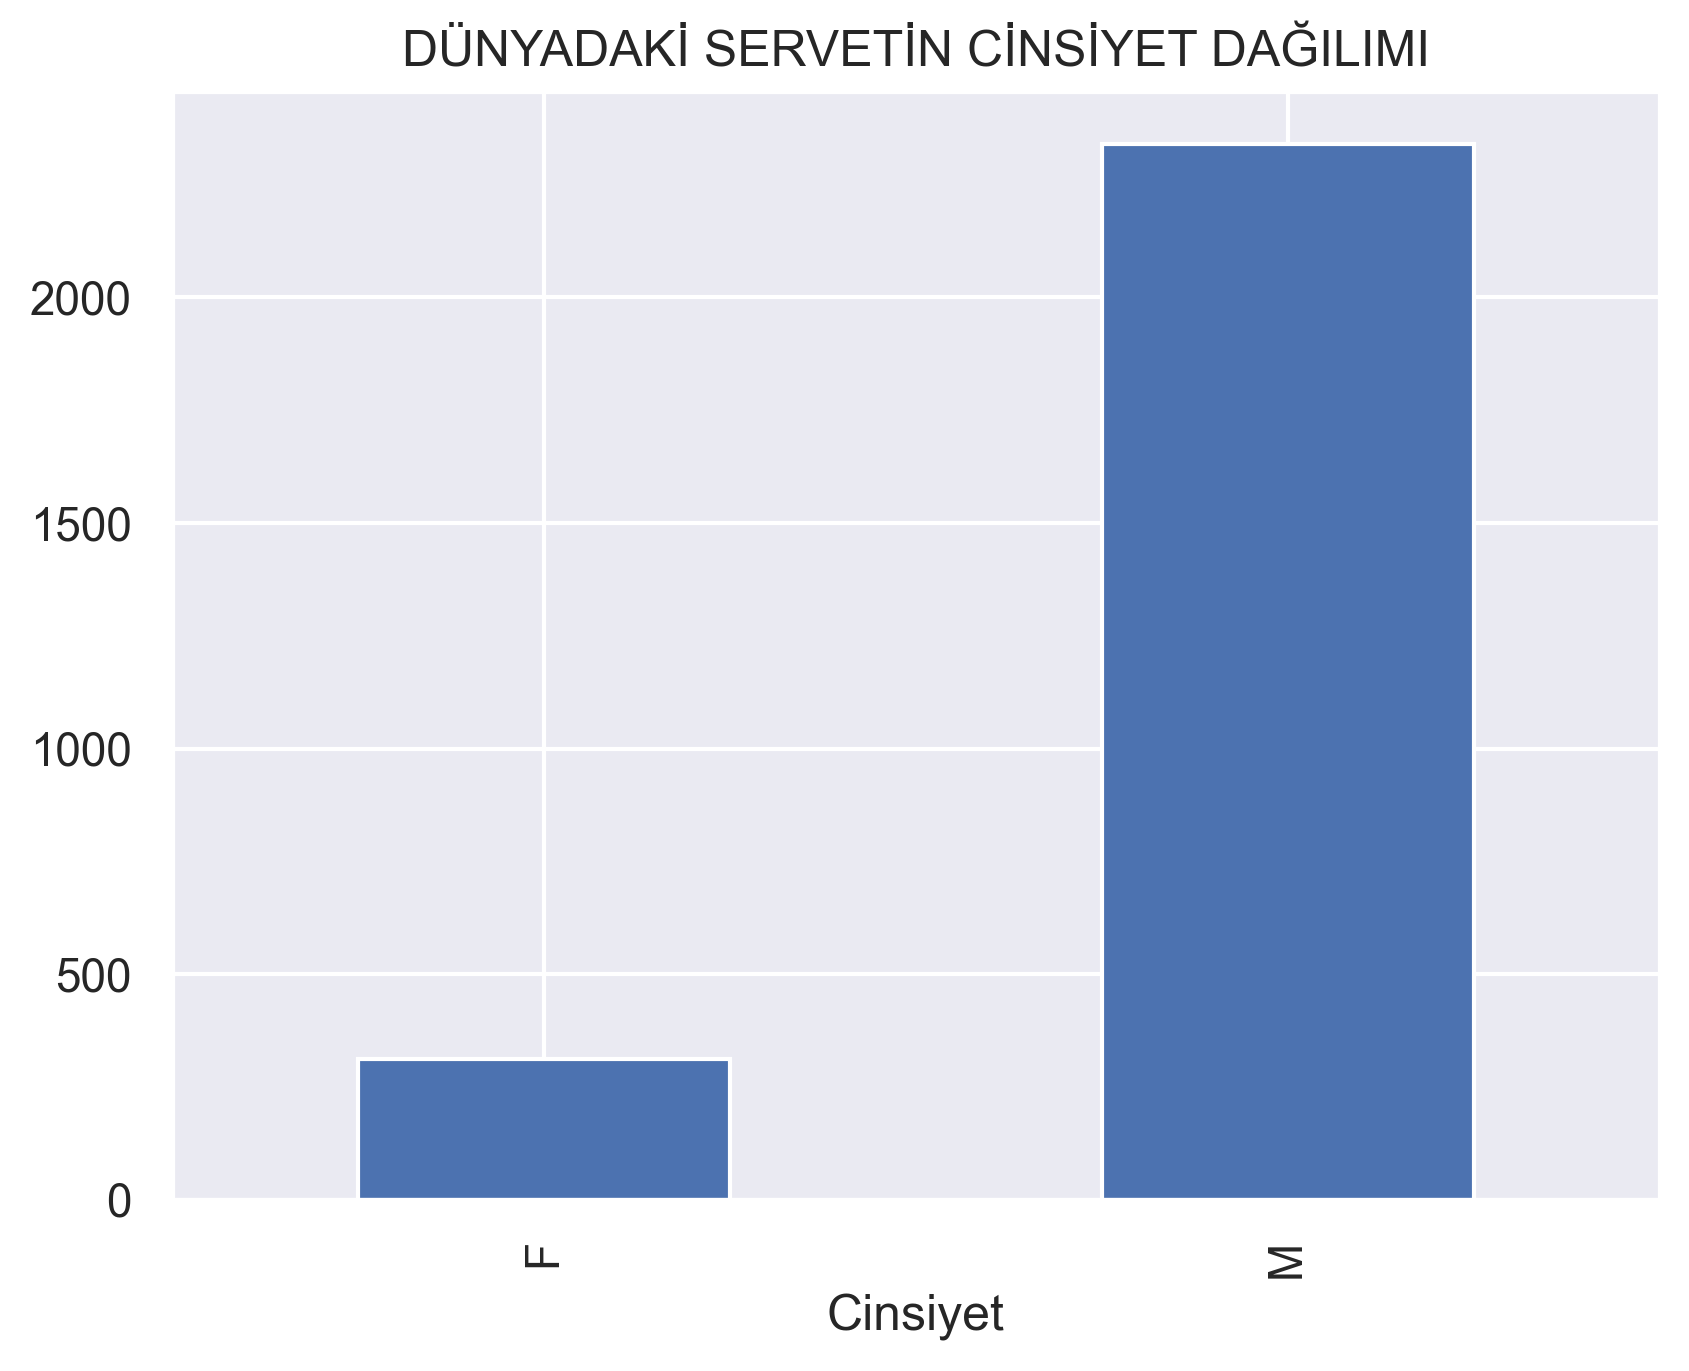

In [28]:
df_gender.size().plot(kind="bar")
plt.title("DÜNYADAKİ SERVETİN CİNSİYET DAĞILIMI")
plt.xlabel("Cinsiyet")

Text(0, 0.5, 'İSİM')

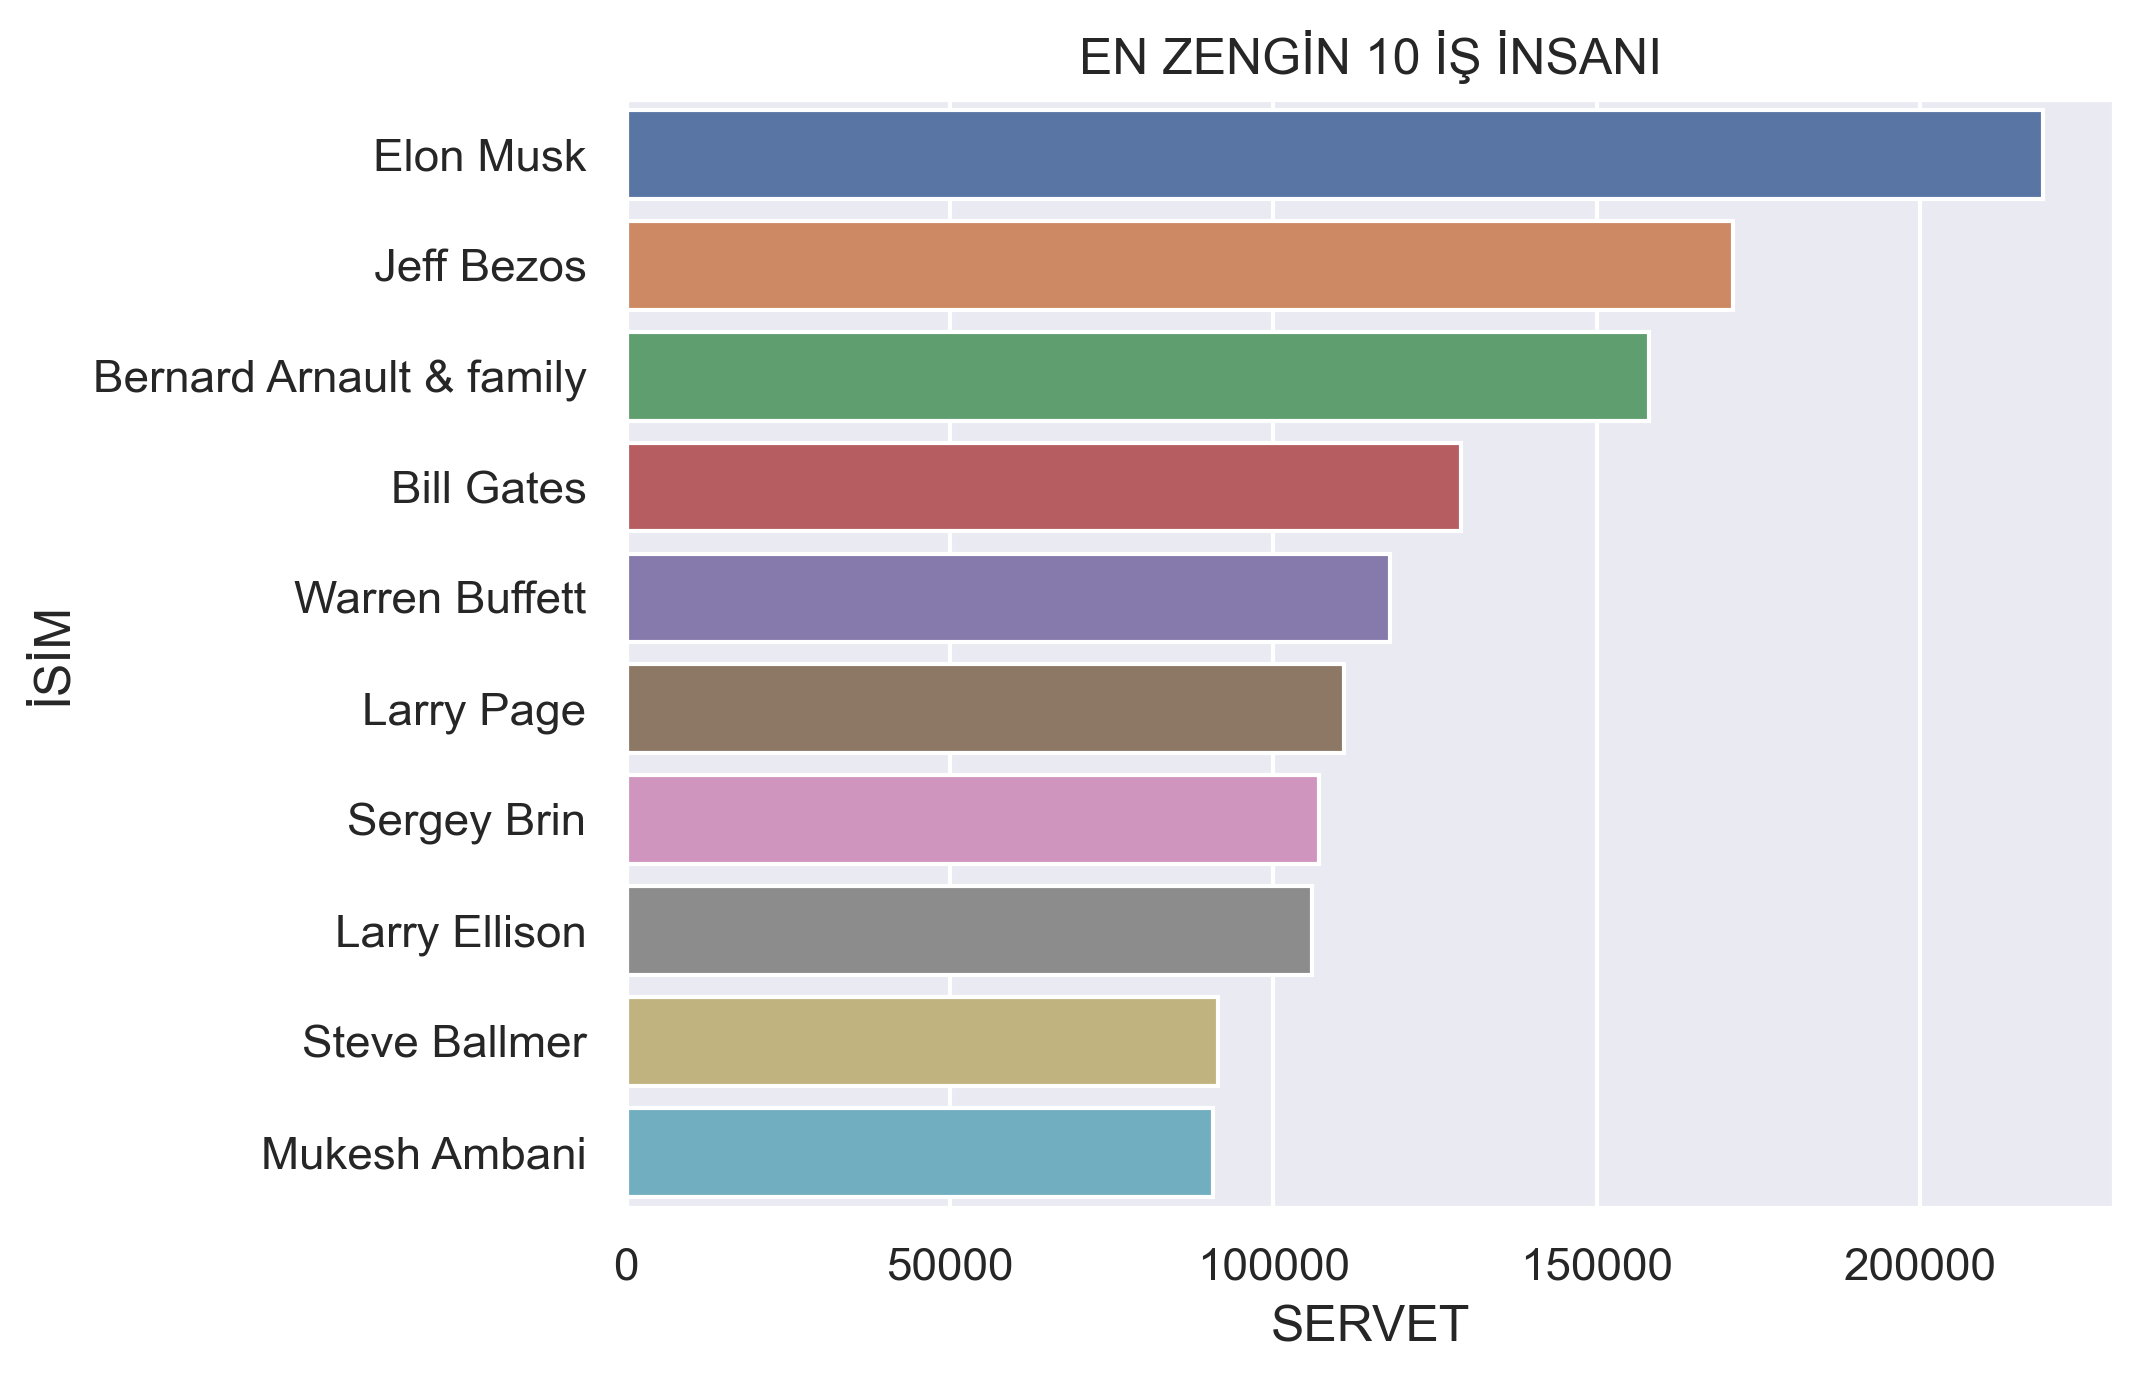

In [169]:
sns.barplot(y=df["personName"][:10],x=df["finalWortht"[:10]])
plt.title("EN ZENGİN 10 İŞ İNSANI")
plt.xlabel("SERVET")
plt.ylabel("İSİM")

In [29]:
df_ulke=df.groupby("country")

In [30]:
df_ulkes_sayi=pd.DataFrame(df_ulke.size().sort_values(ascending=False),columns=["sayi"])

In [31]:
df_ulkes_sayi.head(10)

,sayi
country,
United States,748
China,571
India,159
Germany,112
United Kingdom,85
Switzerland,73
Hong Kong,68
Russia,65
Brazil,54


Text(0, 0.5, 'ÜLKE')

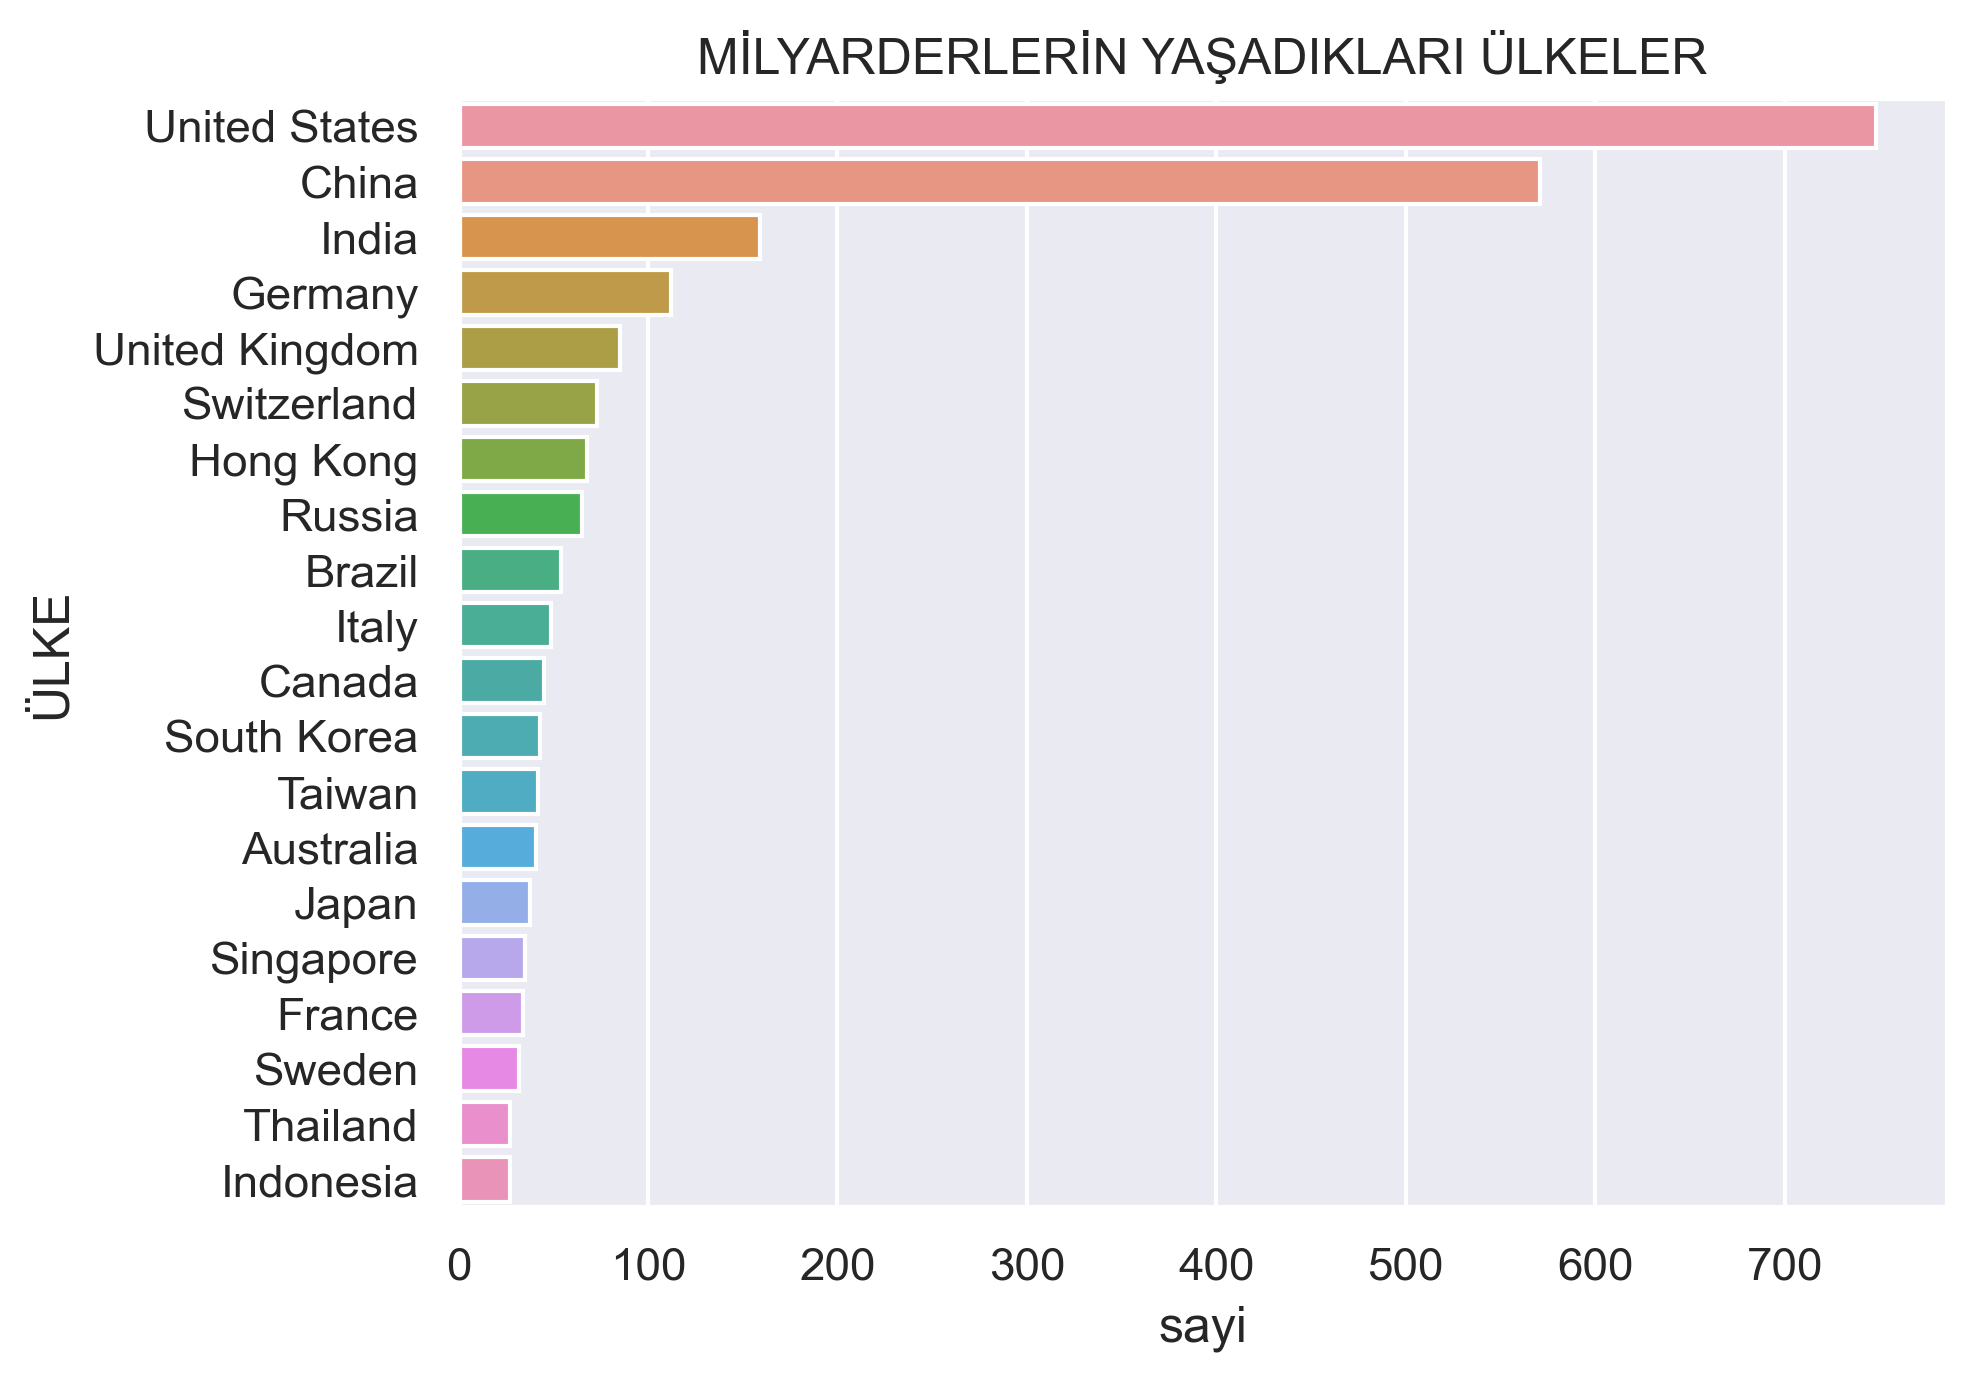

In [167]:
sns.barplot(x=df_ulkes_sayi["sayi"][:20],y=df_ulkes_sayi.index[:20])
plt.title("MİLYARDERLERİN YAŞADIKLARI ÜLKELER")
plt.ylabel("ÜLKE")

In [38]:
df_turkey=df[df["country"]=="Turkey"]

In [100]:
df_turkey.head()

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,gender,title
619,601,Murat Ulker,63.0,4700,Food & Beverage,food,Turkey,NaN,False,M,NaN
1320,1292,Ferit Faik Sahenk,58.0,2400,Diversified,diversified,Turkey,NaN,False,M,NaN
1365,1341,Erman Ilicak,54.0,2300,Construction & Engineering,construction,Turkey,NaN,True,M,NaN
1430,1397,Filiz Sahenk,55.0,2200,Diversified,diversified,Turkey,NaN,False,F,NaN
1580,1579,Sezai Bacaksiz,72.0,1900,Diversified,diversified,Turkey,NaN,True,M,NaN


Text(0, 0.5, 'İSİM')

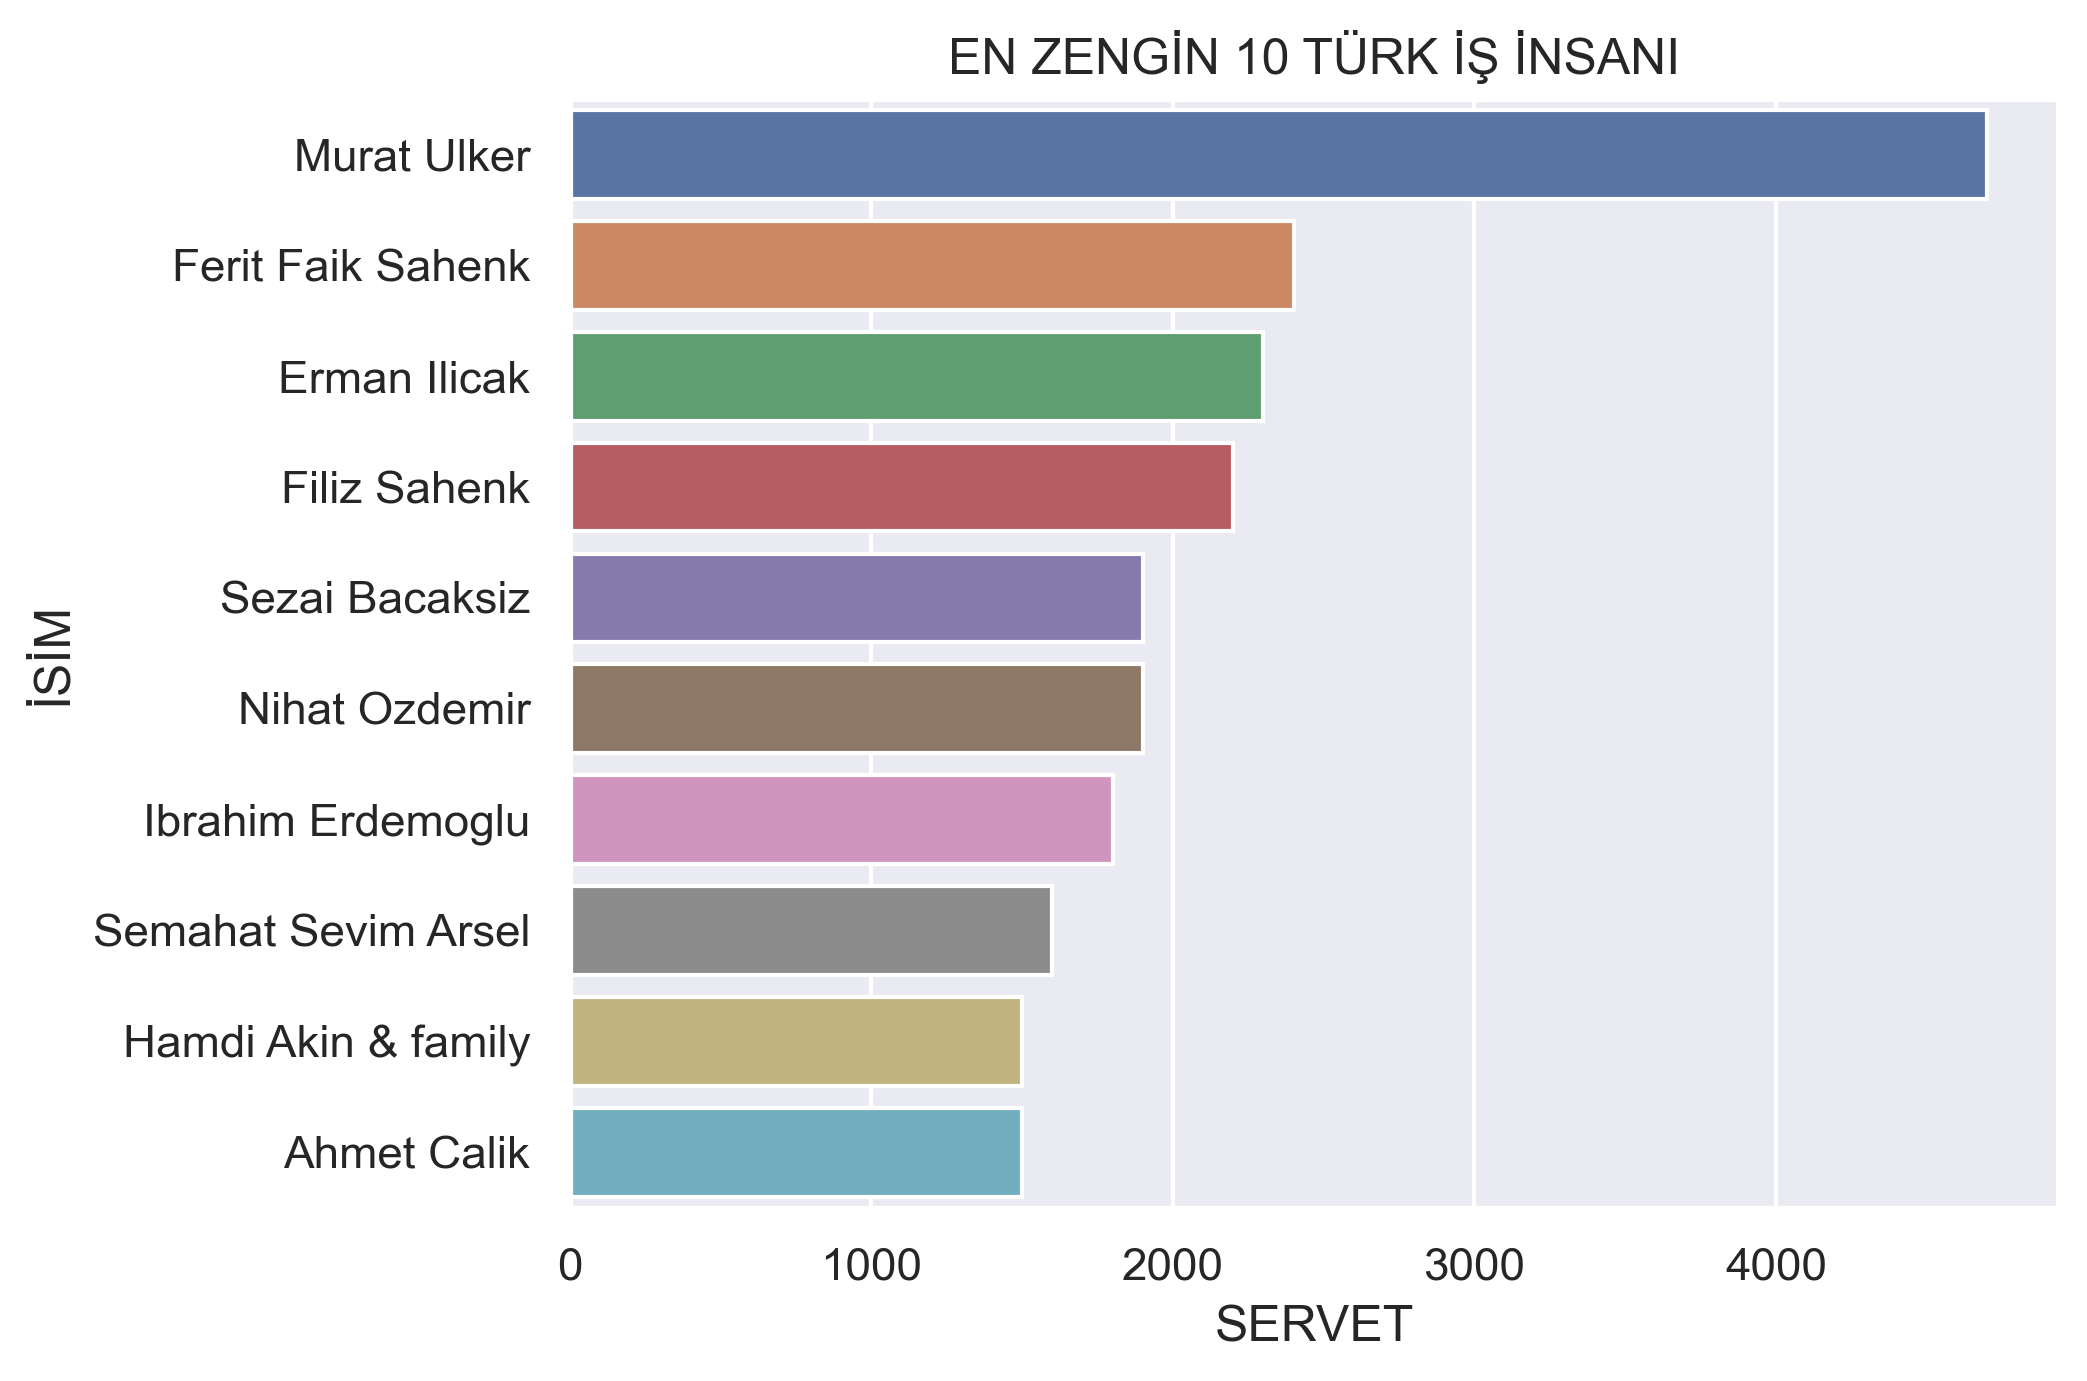

In [161]:
sns.barplot(y=df_turkey["personName"][:10],x=df_turkey["finalWorth"][:10])
plt.title("EN ZENGİN 10 TÜRK İŞ İNSANI")
plt.xlabel("SERVET")
plt.ylabel("İSİM")

In [106]:
df["category"].unique()

array(['Automotive', 'Technology', 'Fashion_Retail',
       'Finance_Investments', 'Diversified', 'Media_Entertainment',
       'Telecom', 'Food_Beverage', 'Logistics', 'RealEstate',
       'Metals_Mining', 'Manufacturing', 'Gambling_Casinos', 'Healthcare',
       'Service', 'Energy', 'Construction_Engineering', 'Sports'],
      dtype=object)

In [32]:
df["category"]=df["category"].apply(lambda x:x.replace(" ","")).\
apply(lambda x:x.replace("&","_"))

In [33]:
df_kategori=df.groupby("category").size()

In [34]:
df_kategori.head()

category
Automotive                   70
Construction_Engineering     46
Diversified                 180
Energy                       95
Fashion_Retail              250
dtype: int64

In [35]:
df_kategori=df_kategori.to_frame()

In [36]:
df_kategori.head()

,0
category,
Automotive,70
Construction_Engineering,46
Diversified,180
Energy,95
Fashion_Retail,250


In [113]:
df_kategori=df_kategori.rename(columns={0:"sayi"}).sort_values(by="sayi",ascending=False)

In [114]:
df_kategori.head()

,sayi
category,
Finance_Investments,392
Technology,343
Manufacturing,337
Fashion_Retail,250
Healthcare,217


Text(0.5, 1.0, 'MİLYARDERLERİN İLGİLENDİĞİ SEKTÖRLER')

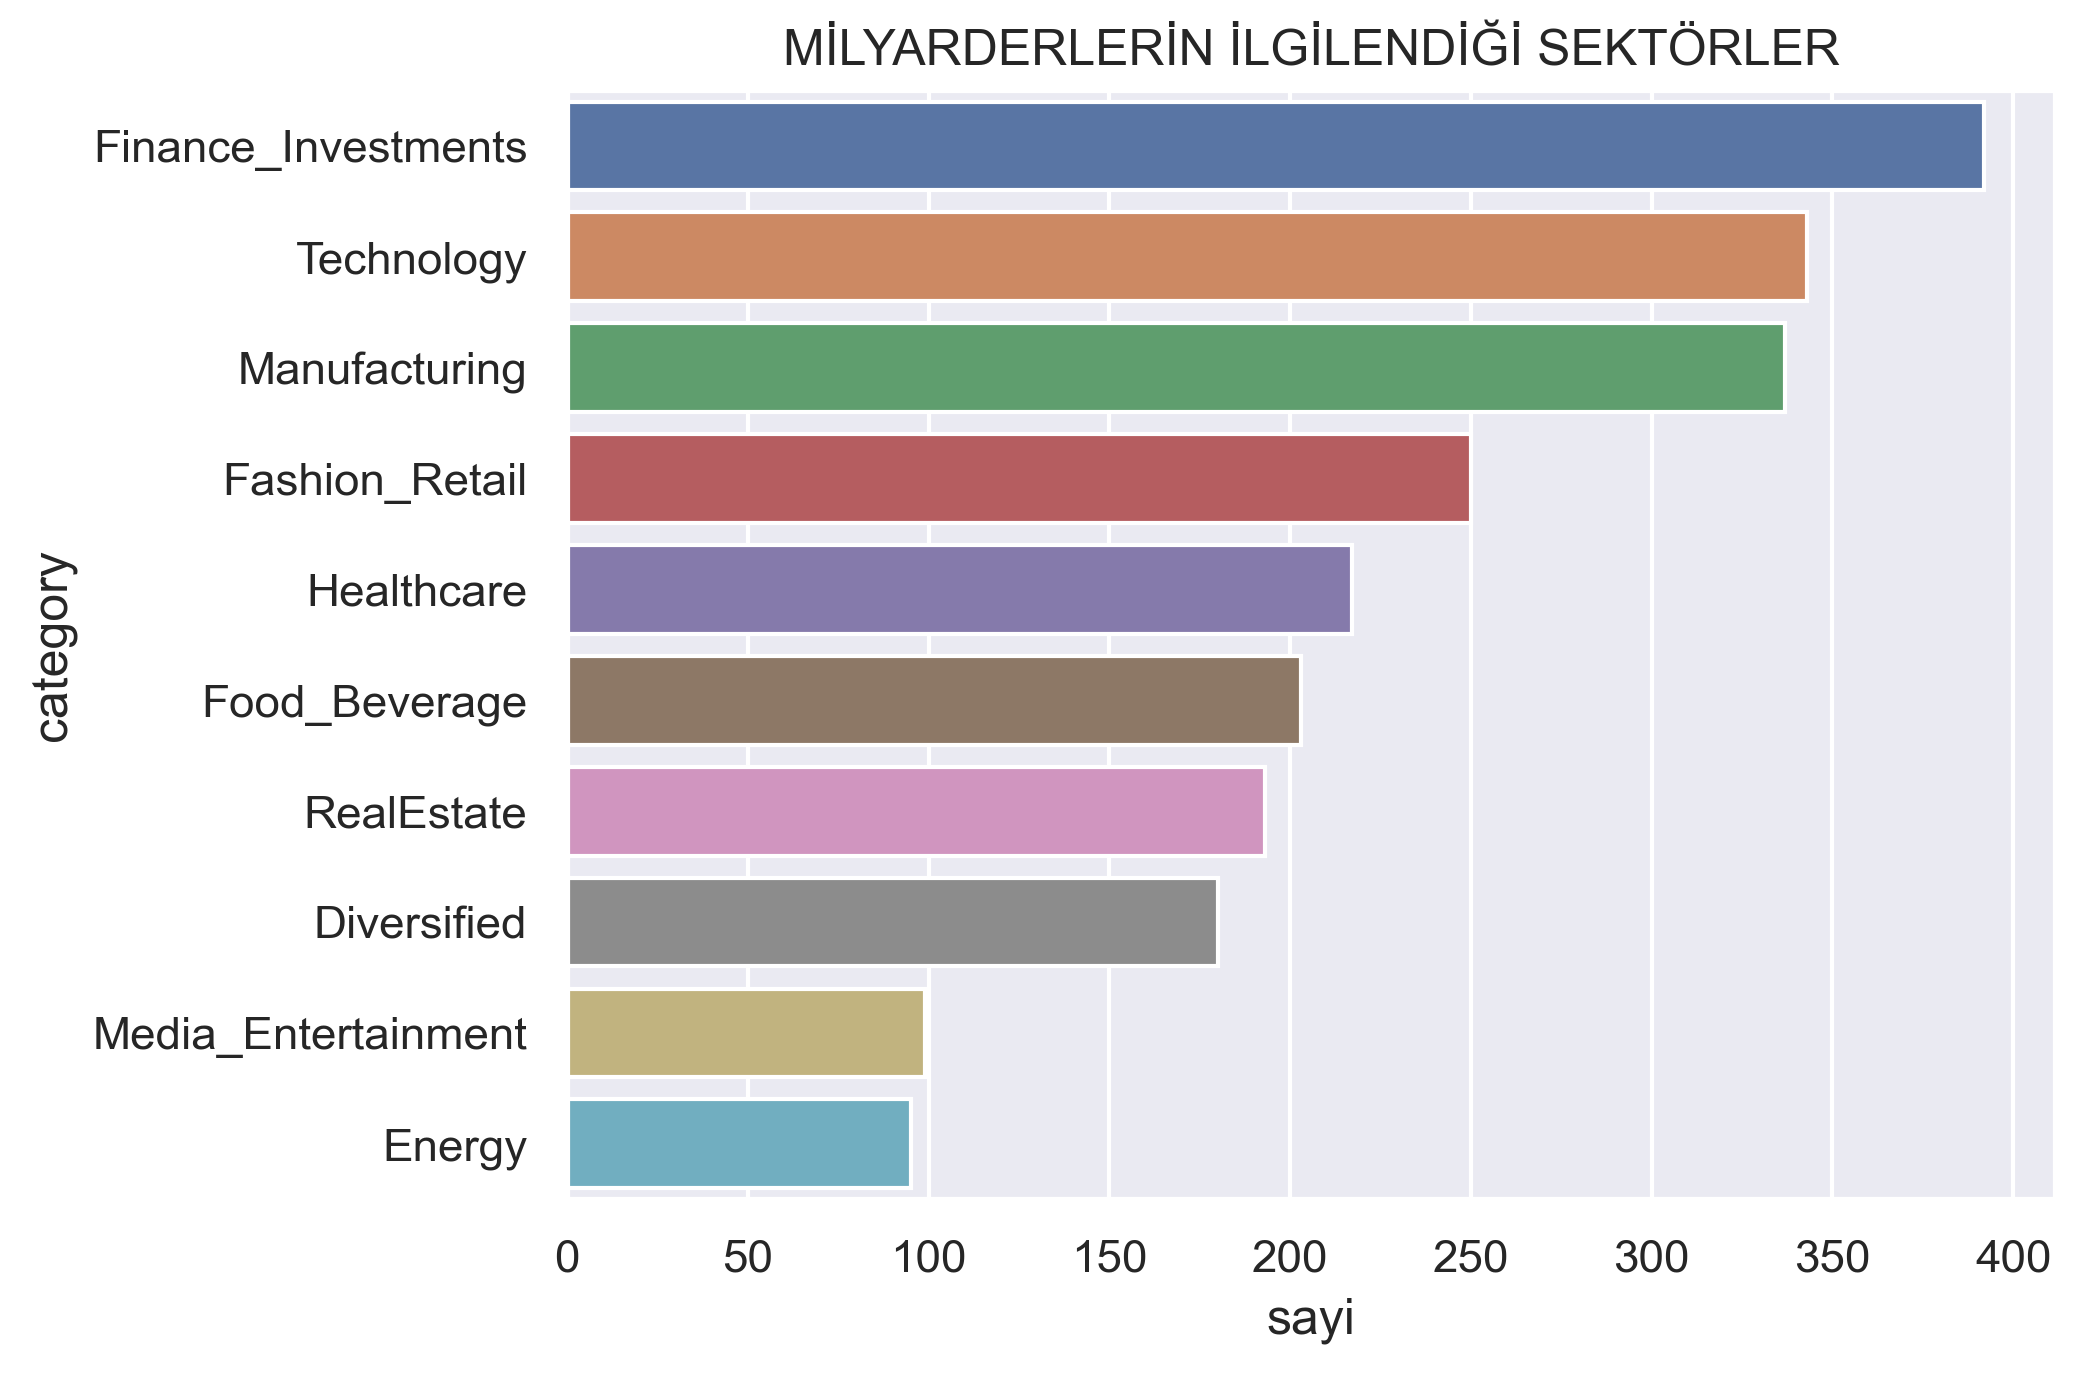

In [174]:
sns.barplot(x=df_kategori["sayi"][:10],y=df_kategori.index[:10])
plt.title("MİLYARDERLERİN İLGİLENDİĞİ SEKTÖRLER")

Text(0.5, 1.0, 'MİLYARDERLERİN YAŞ DAĞILIMI')

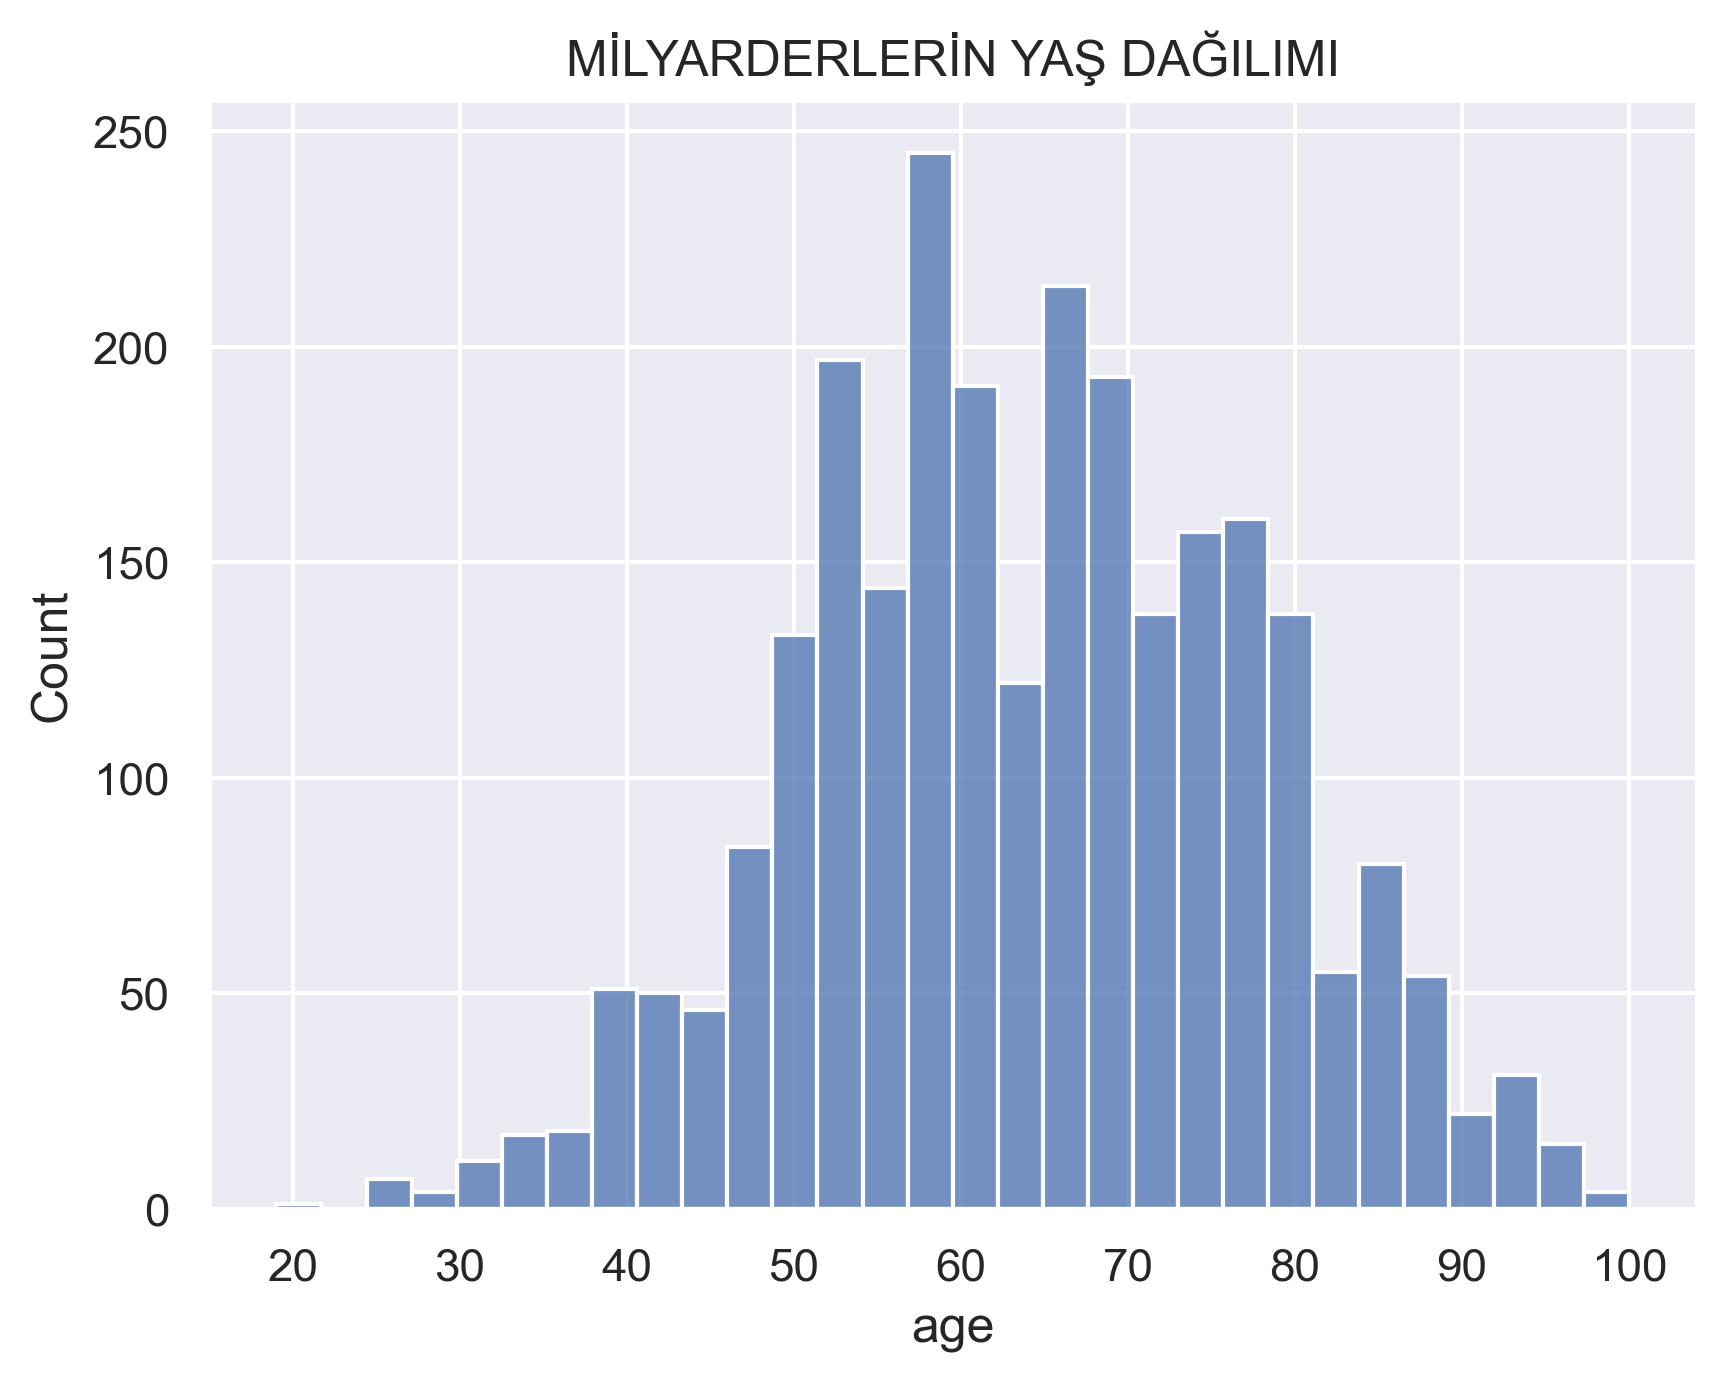

In [176]:
sns.histplot(df["age"])
plt.title("MİLYARDERLERİN YAŞ DAĞILIMI")

In [148]:
df.loc[(df["country"]=="Turkey") & (df["category"])].head(10)

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,gender,title
619,601,Murat Ulker,63.0,4700,Food_Beverage,food,Turkey,NaN,False,M,NaN
1320,1292,Ferit Faik Sahenk,58.0,2400,Diversified,diversified,Turkey,NaN,False,M,NaN
1365,1341,Erman Ilicak,54.0,2300,Construction_Engineering,construction,Turkey,NaN,True,M,NaN
1430,1397,Filiz Sahenk,55.0,2200,Diversified,diversified,Turkey,NaN,False,F,NaN
1580,1579,Sezai Bacaksiz,72.0,1900,Diversified,diversified,Turkey,NaN,True,M,NaN
1619,1579,Nihat Ozdemir,72.0,1900,Diversified,diversified,Turkey,NaN,True,M,NaN
1660,1645,Ibrahim Erdemoglu,59.0,1800,Manufacturing,carpet,Turkey,NaN,True,M,NaN
1820,1818,Semahat Sevim Arsel,93.0,1600,Diversified,diversified,Turkey,NaN,False,F,NaN
1929,1929,Hamdi Akin & family,67.0,1500,Diversified,diversified,Turkey,NaN,True,M,NaN
1943,1929,Ahmet Calik,64.0,1500,Diversified,"energy, banking, construction",Turkey,NaN,True,M,NaN


Text(0, 0.5, 'İSİM')

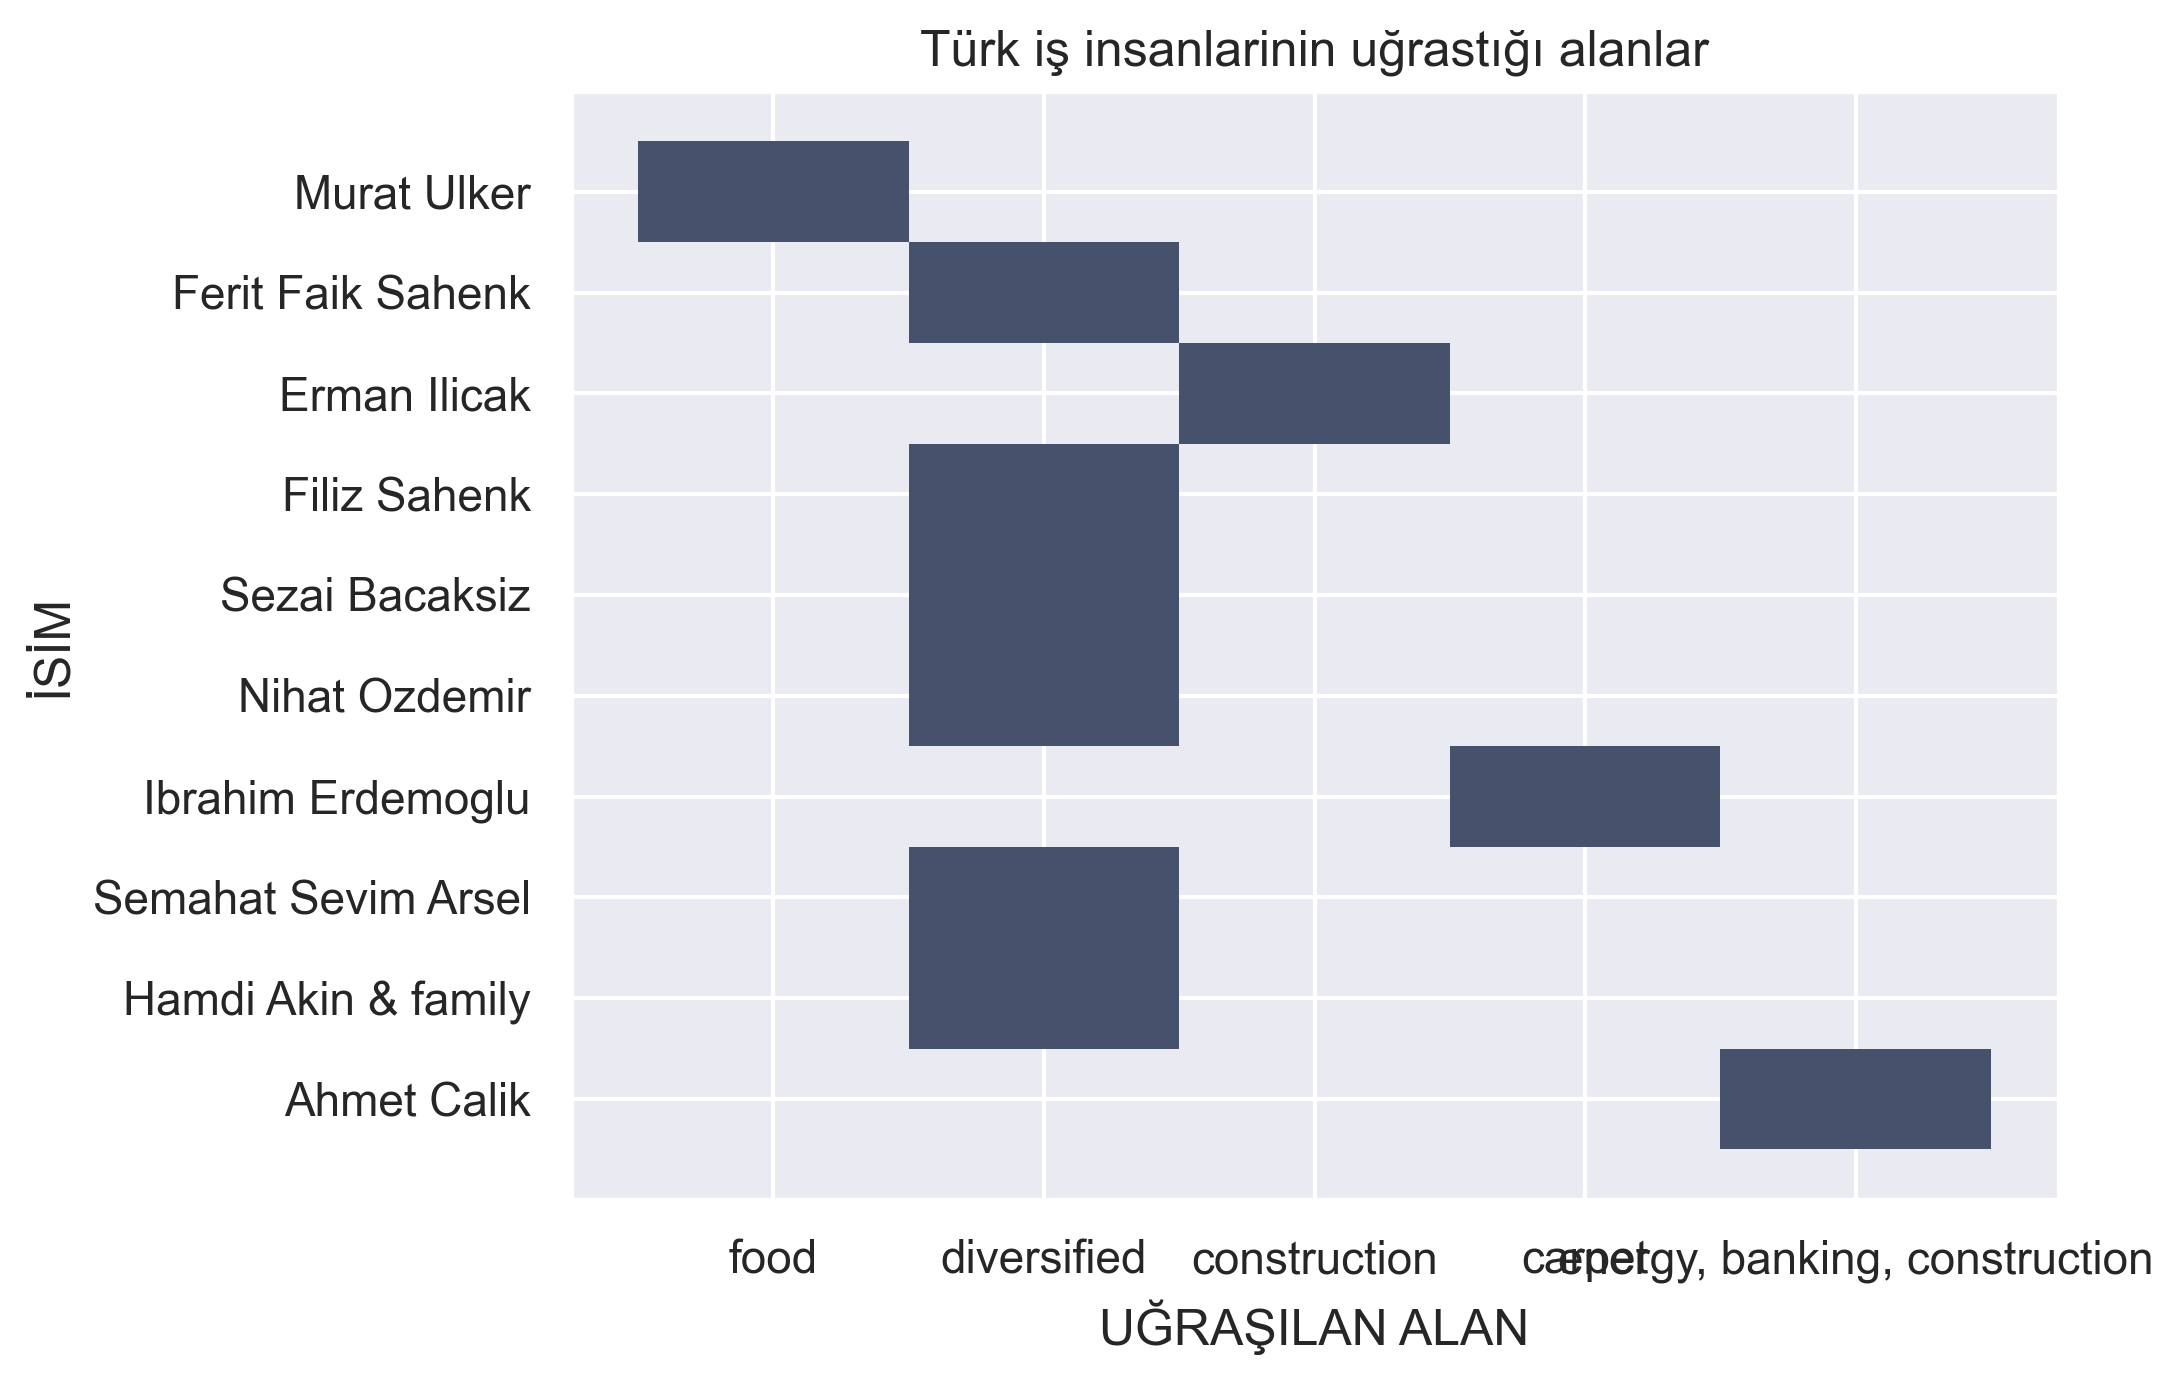

In [39]:
sns.histplot(y=df_turkey["personName"][:10],x=df_turkey["source"][:10])
plt.title("Türk iş insanlarinin uğrastığı alanlar")
plt.xlabel("UĞRAŞILAN ALAN")
plt.ylabel("İSİM")